In [ ]:
!pip install fastai -U

In [ ]:
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = Path('/content/drive/MyDrive/images/')

In [ ]:
def is_jam(x): return (x.find("no") == -1)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_jam)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fine_tune(5, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.760409,0.589702,0.179724,06:37


epoch,train_loss,valid_loss,error_rate,time
0,0.208558,0.234092,0.059908,00:37
1,0.123757,0.030329,0.006912,00:34
2,0.076149,0.047051,0.009217,00:35
3,0.050724,0.017950,0.002304,00:35
4,0.030612,0.019796,0.004608,00:35


In [ ]:
learn.save('32_ResNet50')

Path('/content/drive/MyDrive/images/models/32_ResNet50.pth')

In [ ]:
learn.export('export.pkl')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses

<bound method Interpretation.plot_top_losses of <fastai.interpret.Interpretation object at 0x7f6b75073490>>

In [ ]:
interp.confusion_matrix()

array([[402,   0],
       [  2,  30]])

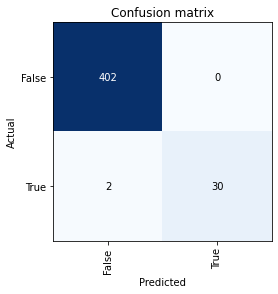

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.metrics=[Precision(), Recall(), F1Score(), accuracy]

In [ ]:
learn.validate()

(#5) [0.01979570835828781,1.0,0.9375,0.967741935483871,0.9953917264938354]

In [ ]:
interp.most_confused()

[(True, False, 2)]

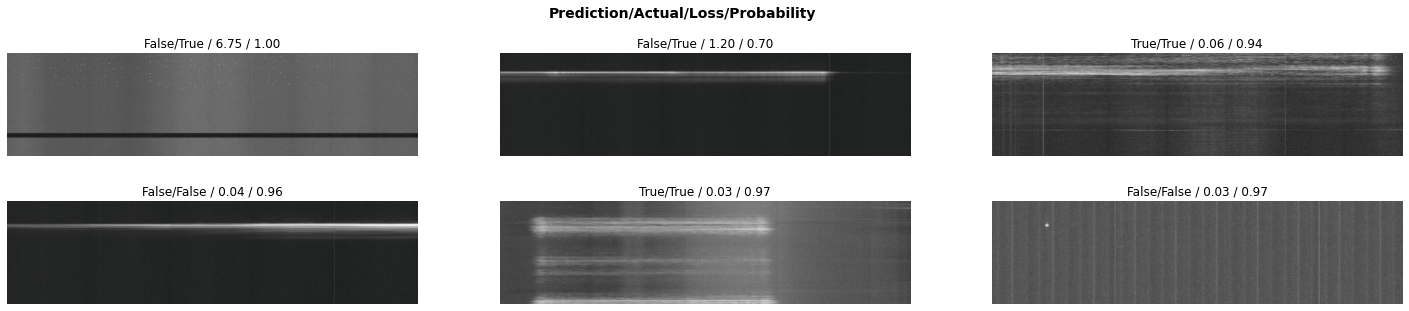

In [ ]:
interp.plot_top_losses(6, figsize=(25,5))